In [69]:
import pandas as pd

In [70]:
from Univariate import Univariate

In [71]:
dataset=pd.read_csv('Placement_Data_Full_Class.csv')

In [72]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [73]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [74]:
dataset["salary"].fillna(0,inplace=True)

In [77]:
preprocessed=pd.DataFrame(dataset)

In [78]:
preprocessed.to_csv("PrePlacemnt.csv")

In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
qual,quan=Univariate.quanqual(dataset)

In [9]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [10]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [11]:
import numpy as np

In [12]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1","Q2","Q3","Q4","IRQ","1.5rule","Lesser","Greater","min","max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1"]=np.percentile(dataset[columnName],25)
    descriptive[columnName]["Q2"]=np.percentile(dataset[columnName],50)
    descriptive[columnName]["Q3"]=np.percentile(dataset[columnName],75)
    descriptive[columnName]["Q4"]=np.percentile(dataset[columnName],100)
    descriptive[columnName]["IRQ"]=descriptive[columnName]["Q3"]-descriptive[columnName]["Q1"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IRQ"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["min"]=dataset[columnName].min()
    descriptive[columnName]["max"]=dataset[columnName].max()
    

In [13]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3332,66.3702,72.1006,62.2782,198702
Median,108,67,65,66,71,62,240000
Mode,1,62,63,65,60,56.7,0
Q1,54.5,60.6,60.9,61,60,57.945,0
Q2,108,67,65,66,71,62,240000
Q3,161.5,75.7,73,72,83.5,66.255,282500
Q4,215,89.4,97.7,91,98,77.89,940000
IRQ,107,15.1,12.1,11,23.5,8.31,282500
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,423750
Lesser,-106,37.95,42.75,44.5,24.75,45.48,-423750


In [14]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)
    

In [15]:
lesser

['hsc_p']

In [16]:
greater

['hsc_p', 'degree_p', 'salary']

In [17]:
for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]

C:\Users\CP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1","Q2","Q3","Q4","IRQ","1.5rule","Lesser","Greater","min","max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1"]=np.percentile(dataset[columnName],25)
    descriptive[columnName]["Q2"]=np.percentile(dataset[columnName],50)
    descriptive[columnName]["Q3"]=np.percentile(dataset[columnName],75)
    descriptive[columnName]["Q4"]=np.percentile(dataset[columnName],100)
    descriptive[columnName]["IRQ"]=descriptive[columnName]["Q3"]-descriptive[columnName]["Q1"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IRQ"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["min"]=dataset[columnName].min()
    descriptive[columnName]["max"]=dataset[columnName].max()

In [19]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [20]:
lesser

[]

In [21]:
greater

[]

In [29]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=["unique_values","frequency","relative_frequency","cusum"])
    freqTable["unique_values"]=dataset[columnName].value_counts().index
    freqTable["frequency"]=dataset[columnName].value_counts().values
    freqTable["relative_frequency"]=(freqTable["frequency"]/103)
    freqTable["cusum"]=freqTable["relative_frequency"].cumsum()
    return freqTable
    

In [30]:
freqTable("hsc_p",dataset)

,unique_values,frequency,relative_frequency,cusum
0,63.00,14,0.135922,0.135922
1,62.00,12,0.116505,0.252427
2,67.00,9,0.087379,0.339806
3,60.00,9,0.087379,0.427184
4,64.00,8,0.077670,0.504854
...,...,...,...,...
86,60.80,1,0.009709,2.048544
87,89.83,1,0.009709,2.058252
88,66.60,1,0.009709,2.067961
89,87.60,1,0.009709,2.077670


In [31]:
dataset["ssc_p"].skew()

-0.13264949031456927

In [32]:
dataset["ssc_p"].kurtosis()

-0.6075102066986688

In [36]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1","Q2","Q3","Q4","IRQ","1.5rule","Lesser","Greater","min","max","kurtosis","skewness","var","std"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1"]=np.percentile(dataset[columnName],25)
    descriptive[columnName]["Q2"]=np.percentile(dataset[columnName],50)
    descriptive[columnName]["Q3"]=np.percentile(dataset[columnName],75)
    descriptive[columnName]["Q4"]=np.percentile(dataset[columnName],100)
    descriptive[columnName]["IRQ"]=descriptive[columnName]["Q3"]-descriptive[columnName]["Q1"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IRQ"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["min"]=dataset[columnName].min()
    descriptive[columnName]["max"]=dataset[columnName].max()
    descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
    descriptive[columnName]["skewness"]=dataset[columnName].skew()
    descriptive[columnName]["var"]=dataset[columnName].var()
    descriptive[columnName]["std"]=dataset[columnName].std()

In [37]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108,67.3034,66.3347,66.3586,72.1006,62.2782,197615
Median,108,67,65,66,71,62,240000
Mode,1,62,63,65,60,56.7,0
Q1,54.5,60.6,60.9,61,60,57.945,0
Q2,108,67,65,66,71,62,240000
Q3,161.5,75.7,73,72,83.5,66.255,282500
Q4,215,89.4,91.15,88.5,98,77.89,706250
IRQ,107,15.1,12.1,11,23.5,8.31,282500
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,423750
Lesser,-106,37.95,42.75,44.5,24.75,45.48,-423750


In [40]:
import seaborn as sns

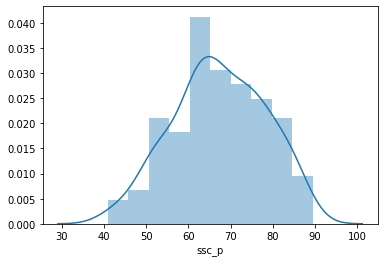

In [41]:
sns.distplot(dataset["ssc_p"])

In [54]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean, sample_std))
    dist=norm(sample_mean, sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303,Standard Deviation=10.827
The area between range(60,70):0.3449514151280294


0.3449514151280294

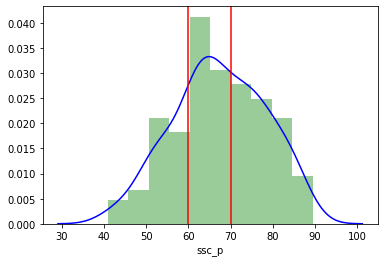

In [55]:
get_pdf_probability(dataset['ssc_p'],60,70)

In [56]:
#!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 3.9 MB/s eta 0:00:00
     ------------------------------------- 233.3/233.3 kB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 53.5/53.5 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 14.0/14.0 MB 9.6 MB/s eta 0:00:00
     --------------------------------------- 34.1/34.1 MB 10.2 MB/s eta 0:00:00
     --------------------------------------- 10.0/10.0 MB 11.6 MB/s eta 0:00:00
     ------------------------------------- 229.9/229.9 kB 13.7 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 kB 16.1 MB/s eta 0:00:00


In [58]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['ssc_p'])

In [59]:
ecdf(80)

0.8651162790697674

In [64]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score, kde = True)
    sum(z_score)/len(z_score)

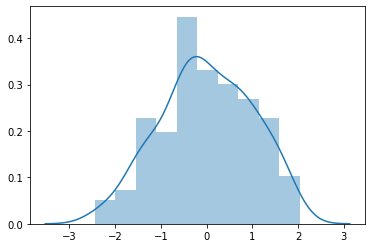

In [65]:
stdNBgraph(dataset['ssc_p'])